# Random Forest Regressor for Sales Predictions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor

import sys
import mlflow


In [2]:

#import custome modules
sys.path.append('../')

from scripts.get_missing_information import MissingInformation
from scripts.get_dataframe_information import DataFrameInformation
from scripts.ploting_utils import Plotters
from scripts.data_clean_handler import CleanData
from scripts import data_loader
from scripts.dvc_data_fetch import DataLoader
from scripts.feature_engineering import FeatureEngineering
from scripts.sklearn_training_pipeline import (run_train_pipeline, get_pipeline,)


feng = FeatureEngineering()
dvc_load = DataLoader()
cleaner = CleanData()
minfo = MissingInformation()
dinfo = DataFrameInformation()
pltu = Plotters(6,4)

In [3]:
train_df = pd.read_csv('../data/cleaned/train.csv')

/var/folders/6b/0t1qb1d92f72c46kvp35pwfc0000gn/T/ipykernel_10956/372095891.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/cleaned/train.csv')


In [4]:
train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
WeekOfYear                   0
Year                         0
Month                        0
is_month_end                 0
is_month_start               0
is_quarter_end               0
is_quarter_start             0
is_year_end                  0
is_year_start                0
DistanceToNextHoliday        0
DistanceFromPrevHoliday      0
dtype: int64

In [5]:

timeframe = train_df.Date.unique()
timeframe.sort()
print(f"Starts at {timeframe[0]} --- ends at: {timeframe[-1]}")
print(f"It spans for {len(timeframe)} days")


Starts at 2013-01-01 --- ends at: 2015-07-31
It spans for 942 days


In [6]:
train_df = train_df[train_df['Store']==1]

In [7]:
pipeline = get_pipeline(model=RandomForestRegressor(n_estimators=10, n_jobs=10),
                        x=train_df.drop(columns=['Sales']))


In [8]:
pipeline

SkLearnPipeline(steps=[('preprocessor',
                        ColumnTransformer(transformers=[('num',
                                                         Pipeline(steps=[('scale',
                                                                          StandardScaler())]),
                                                         ['Store', 'DayOfWeek',
                                                          'Open', 'Promo',
                                                          'SchoolHoliday',
                                                          'CompetitionDistance',
                                                          'CompetitionOpenSinceYear',
                                                          'Promo2',
                                                          'Promo2SinceWeek',
                                                          'Promo2SinceYear',
                                                          'WeekOfYear', 'Year',
                                                          'Month',
                                                          'DistanceToNextHoliday',
                                                          'DistanceFromPrevHoliday']),
                                                        (...
                                                                                                                       'is_month_end',
                                                                                                                       'is_month_start',
                                                                                                                       'is_quarter_end',
                                                                                                                       'is_quarter_start',
                                                                                                                       'is_year_end',
                                                                                                                       'is_year_start']}))]),
                                                         ['Date',
                                                          'StateHoliday',
                                                          'StoreType',
                                                          'Assortment',
                                                          'CompetitionOpenSinceMonth',
                                                          'PromoInterval',
                                                          'is_month_end',
                                                          'is_month_start',
                                                          'is_quarter_end',
                                                          'is_quarter_start',
                                                          'is_year_end',
                                                          'is_year_start'])])),
                       ('model',
                        RandomForestRegressor(n_estimators=10, n_jobs=10))])

In [9]:
train, val = train_df.iloc[:int(
    len(train_df)*.8), :], train_df.iloc[int(len(train_df)*.8):, :]

X_train = train.drop(columns=['Sales'])
X_val = val.drop(columns=['Sales'])
y_train = train['Sales'].values
y_val = val['Sales'].values


In [10]:
pipeline.fit(X_train, y_train)


SkLearnPipeline(steps=[('preprocessor',
                        ColumnTransformer(transformers=[('num',
                                                         Pipeline(steps=[('scale',
                                                                          StandardScaler())]),
                                                         ['Store', 'DayOfWeek',
                                                          'Open', 'Promo',
                                                          'SchoolHoliday',
                                                          'CompetitionDistance',
                                                          'CompetitionOpenSinceYear',
                                                          'Promo2',
                                                          'Promo2SinceWeek',
                                                          'Promo2SinceYear',
                                                          'WeekOfYear', 'Year',
                                                          'Month',
                                                          'DistanceToNextHoliday',
                                                          'DistanceFromPrevHoliday']),
                                                        (...
                                                                                                                       'is_month_end',
                                                                                                                       'is_month_start',
                                                                                                                       'is_quarter_end',
                                                                                                                       'is_quarter_start',
                                                                                                                       'is_year_end',
                                                                                                                       'is_year_start']}))]),
                                                         ['Date',
                                                          'StateHoliday',
                                                          'StoreType',
                                                          'Assortment',
                                                          'CompetitionOpenSinceMonth',
                                                          'PromoInterval',
                                                          'is_month_end',
                                                          'is_month_start',
                                                          'is_quarter_end',
                                                          'is_quarter_start',
                                                          'is_year_end',
                                                          'is_year_start'])])),
                       ('model',
                        RandomForestRegressor(n_estimators=10, n_jobs=10))])

In [11]:
preds = pipeline.predict(X_val)


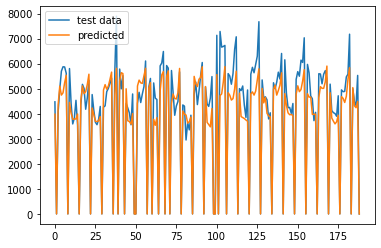

In [12]:
sns.lineplot(x=[*range(len(y_val))], y=y_val)
sns.lineplot(x=[*range(len(preds))], y=preds)
plt.legend(['test data', 'predicted'])


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
sqrt_mse = np.sqrt(mean_squared_error(y_val, preds))
print(f"The Square root of our mean Squared error is: {sqrt_mse}")
r2 = r2_score(y_val, preds)
print(f"The R2-Score is: {r2}")


The Square root of our mean Squared error is: 672.9430216766353
The R2-Score is: 0.8987021118270476


Text(0.5, 1.0, 'Sales outliers')

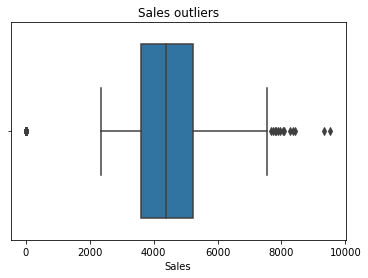

In [14]:
sns.boxplot(data=train_df, x='Sales')
plt.title("Sales outliers")


{'mse': 429021.98, 'r2': 0.9, 'mae': 471.01}
Run params saved
Run metrics saved
figures saved with mlflow
saving dict
Run - run 1 | est-16 | depth-8 is logged to Experiment - Baseline-Regression-Model


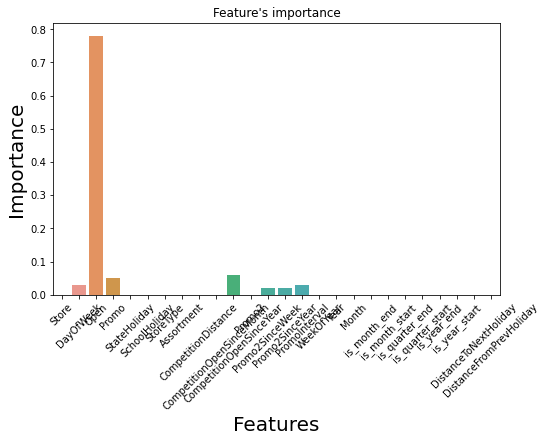

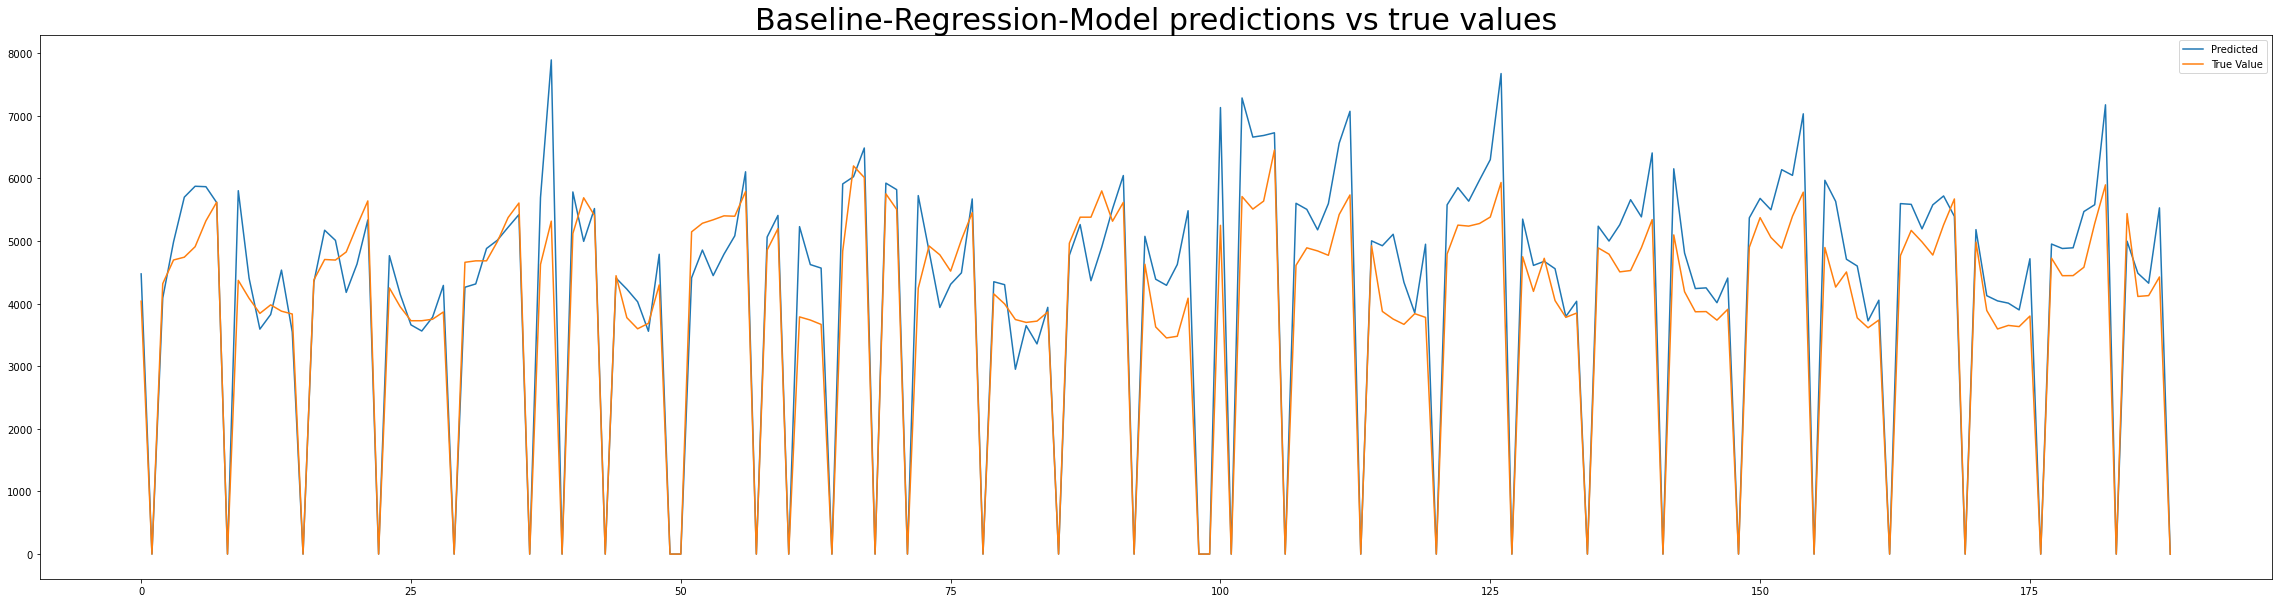

In [15]:
DEPTH = 8
ESTIMATORS = 16
mlflow.end_run()
model = RandomForestRegressor(
    n_estimators=DEPTH,
    max_depth=ESTIMATORS,
    n_jobs=4,
    random_state=77)
pipeline = run_train_pipeline(model=model,
                              x=train_df,
                              experiment_name='Baseline-Regression-Model',
                              run_name=f'run 1 | est-{ESTIMATORS} | depth-{DEPTH}')

mlflow.end_run()
